In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12187079447211168633
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2249719808
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12165334304820846534
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [5]:

import cv2
import pandas as pd
df_calc = pd.read_csv("D:/HariPrasanna/miniproject/dataset/k_CBIS-DDSM/calc_case(with_jpg_img).csv")
df_mass = pd.read_csv("D:/HariPrasanna/miniproject/dataset/k_CBIS-DDSM/mass_case(with_jpg_img).csv")
df_all_cases = pd.concat([df_calc, df_mass])
df_all_cases.shape[0]

3568

Full Mammograms:

jpg_img/Mass_Training_P_00001_LEFT_CC-1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994-1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/full-mammogram-images-img_0-1.jpg
jpg_img/Mass_Training_P_00001_LEFT_MLO-1.3.6.1.4.1.9590.100.1.2.319478999311971442426185353560182990988-1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/full-mammogram-images-img_0-1.jpg
jpg_img/Mass_Training_P_00004_LEFT_CC-1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697-1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/full-mammogram-images-img_0-1.jpg
jpg_img/Mass_Training_P_00004_LEFT_MLO-1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939-1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/full-mammogram-images-img_0-1.jpg
jpg_img/Mass_Training_P_00004_RIGHT_MLO-1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486-1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/ful

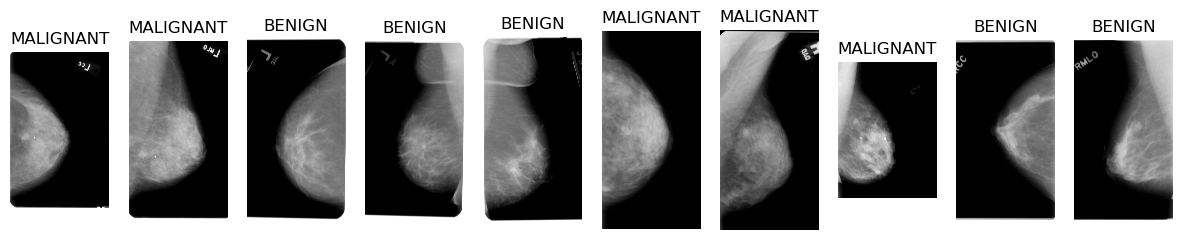

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    directory_path='D:/HariPrasanna/miniproject/dataset/k_CBIS-DDSM/'
    # Loop through rows and display images
    for index, row in df_mass.head(number_to_visualize).iterrows():
        image_path = row[column]
        d =os.path.join(directory_path,image_path)
        image = mpimg.imread(d)
        print(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')

print('Full Mammograms:\n')
display_images('jpg_fullMammo_img_path', 10)


In [7]:
resize_images=[]
labels=[]
for i in range(df_all_cases.shape[0]):
    image=cv2.imread(os.path.join("D:/HariPrasanna/miniproject/dataset/k_CBIS-DDSM/", df_all_cases["jpg_fullMammo_img_path"].iloc[i]))
    target=df_all_cases["pathology"].iloc[i]
    if target!="BENIGN_WITHOUT_CALLBACK":
        image=cv2.resize(image,(64,64))
        resize_images.append(image)
        labels.append(target)


In [8]:
change_values={"MALIGNANT":0,
              "BENIGN":1,
              }

In [9]:
target_values=[]
for i in labels:
    target_values.append(change_values[i])

In [10]:
import numpy as np
target_values=np.array(target_values)
resize_images=np.array(resize_images)
len(resize_images)

2886

(64, 64, 3)

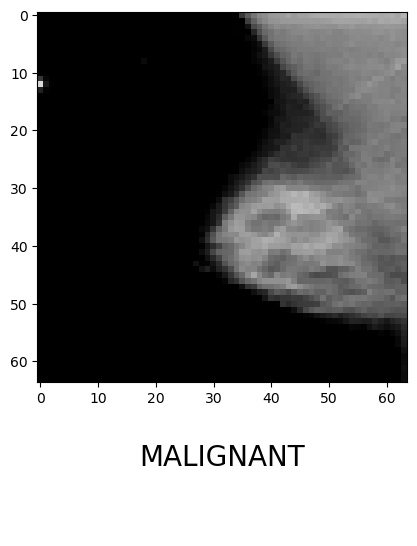

In [11]:
img=resize_images[2885]
plt.imshow(img)
plt.xlabel("\n"+str(df_all_cases["pathology"].iloc[0]+"\n\n"), fontsize=20)
img.shape

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
alexnet = Sequential()
alexnet.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
alexnet.add(Conv2D(32, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

alexnet.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
alexnet.add(Conv2D(64, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

alexnet.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
alexnet.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
alexnet.add(Flatten())
alexnet.add(Dense(128,activation="relu"))

In [13]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(resize_images,target_values,test_size=0.2,random_state=123)

In [28]:
labels.count('MALIGNANT')

1457

In [29]:
labels.count('BENIGN')

1429

In [30]:
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Assuming your classes are encoded as integers where 0 represents benign and 1 represents malignant
count_benign_train = train_counts[0]
count_malignant_train = train_counts[1]
count_benign_test = test_counts[0]
count_malignant_test = test_counts[1]

print("Train Set:")
print("Count of benign:", count_benign_train)
print("Count of malignant:", count_malignant_train)

print("\nTest Set:")
print("Count of benign:", count_benign_test)
print("Count of malignant:", count_malignant_test)

Train Set:
Count of benign: 1154
Count of malignant: 1154

Test Set:
Count of benign: 303
Count of malignant: 275


In [31]:
import numpy as np

# Convert lists to numpy arrays for easier manipulation
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Get indices of malignant and benign samples
malignant_indices = np.where(y_test_np == 0)[0]  # Assuming 0 represents malignant
benign_indices = np.where(y_test_np == 1)[0]     # Assuming 1 represents benign

# Shuffle the malignant indices to randomly select samples
np.random.shuffle(malignant_indices)

# Determine the number of excess malignant samples
num_excess_malignant = len(malignant_indices) - len(benign_indices)

# Remove excess malignant samples from both X_test and y_test
X_test_balanced = np.delete(X_test_np, malignant_indices[:num_excess_malignant], axis=0)
y_test_balanced = np.delete(y_test_np, malignant_indices[:num_excess_malignant])

# Shuffle the balanced test set to randomize the order
shuffled_indices = np.random.permutation(len(X_test_balanced))
X_test_balanced = X_test_balanced[shuffled_indices]
y_test_balanced = y_test_balanced[shuffled_indices]

# Check the counts of each class in the balanced test set
print("Count of malignant in balanced test set:", np.sum(y_test_balanced == 0))
print("Count of benign in balanced test set:", np.sum(y_test_balanced == 1))


Count of malignant in balanced test set: 275
Count of benign in balanced test set: 275


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.regularizers import l2

# Initialize the model
alexnet = Sequential()

# Add convolutional layers
alexnet.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(32, (3,3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

alexnet.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(64, (3,3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

alexnet.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet.add(BatchNormalization())
alexnet.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

# Flatten layer
alexnet.add(Flatten())

# Fully connected layers
alexnet.add(Dense(128, activation="relu"))

# Output layer
alexnet.add(Dense(1, kernel_regularizer=l2(0.01), activation="linear"))

# Compile the model
learning_rate = 0.0001
opti = RMSprop(lr=learning_rate)
alexnet.compile(optimizer=opti, loss='hinge', metrics=['accuracy'])

# Train the model
history = alexnet.fit(x=X_train, y=y_train, validation_data=(X_test_balanced, y_test_balanced), epochs=200, batch_size=50)


Epoch 1/200
47/47 [==============================] - 4s 52ms/step - loss: 1.1864 - accuracy: 0.5537 - val_loss: 0.9904 - val_accuracy: 0.5291
Epoch 2/200
47/47 [==============================] - 2s 38ms/step - loss: 0.6455 - accuracy: 0.7136 - val_loss: 0.9839 - val_accuracy: 0.5473
Epoch 3/200
47/47 [==============================] - 2s 38ms/step - loss: 0.4795 - accuracy: 0.7903 - val_loss: 1.0040 - val_accuracy: 0.5564
Epoch 4/200
47/47 [==============================] - 2s 38ms/step - loss: 0.3397 - accuracy: 0.8536 - val_loss: 0.9074 - val_accuracy: 0.5782
Epoch 5/200
47/47 [==============================] - 2s 38ms/step - loss: 0.2627 - accuracy: 0.8925 - val_loss: 0.9902 - val_accuracy: 0.5709
Epoch 6/200
47/47 [==============================] - 2s 38ms/step - loss: 0.2114 - accuracy: 0.9125 - val_loss: 0.9855 - val_accuracy: 0.5655
Epoch 7/200
47/47 [==============================] - 2s 38ms/step - loss: 0.1669 - accuracy: 0.9363 - val_loss: 0.9715 - val_accuracy: 0.5564
Epoch 

In [36]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
k = 3  # You can adjust the number of folds as needed

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True)

# Lists to store evaluation results
val_loss_history = []
val_accuracy_history = []
train_accuracy_history = []

# Perform K-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold}/{k}")
    
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Reinitialize the model  # You can define create_alexnet function to create the model
    
    # Compile the model
    learning_rate = 0.0001
    opti = RMSprop(lr=learning_rate)
    alexnet.compile(optimizer=opti, loss='hinge', metrics=['accuracy'])
    
    # Train the model
    history = alexnet.fit(x=X_train_fold, y=y_train_fold, validation_data=(X_val_fold, y_val_fold), 
                          epochs=200, batch_size=50, verbose=1)
    
    # Evaluate the model on validation data for this fold
    val_loss, val_accuracy = alexnet.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    # Append results to lists
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)
    train_accuracy_history.append(history.history['accuracy'][-1])

# Calculate average validation loss and accuracy across folds
avg_val_loss = np.mean(val_loss_history)
avg_val_accuracy = np.mean(val_accuracy_history)
avg_train_accuracy = np.mean(train_accuracy_history)

print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_accuracy)
print("Average Training Accuracy:", avg_train_accuracy)


Fold 1/3
Epoch 1/200
31/31 [==============================] - 3s 46ms/step - loss: 0.0324 - accuracy: 0.9870 - val_loss: 0.0766 - val_accuracy: 0.9589
Epoch 2/200
31/31 [==============================] - 1s 39ms/step - loss: 0.0248 - accuracy: 0.9896 - val_loss: 0.0817 - val_accuracy: 0.9805
Epoch 3/200
31/31 [==============================] - 1s 40ms/step - loss: 0.0249 - accuracy: 0.9896 - val_loss: 0.0591 - val_accuracy: 0.9719
Epoch 4/200
31/31 [==============================] - 1s 42ms/step - loss: 0.0229 - accuracy: 0.9902 - val_loss: 0.0559 - val_accuracy: 0.9697
Epoch 5/200
31/31 [==============================] - 1s 41ms/step - loss: 0.0223 - accuracy: 0.9896 - val_loss: 0.0555 - val_accuracy: 0.9762
Epoch 6/200
31/31 [==============================] - 1s 41ms/step - loss: 0.0221 - accuracy: 0.9909 - val_loss: 0.0416 - val_accuracy: 0.9848
Epoch 7/200
31/31 [==============================] - 1s 40ms/step - loss: 0.0215 - accuracy: 0.9915 - val_loss: 0.0385 - val_accuracy: 0.98

In [37]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
k = 2  # You can adjust the number of folds as needed

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True)

# Lists to store evaluation results
val_loss_history = []
val_accuracy_history = []
train_accuracy_history = []

# Perform K-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold}/{k}")
    
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Reinitialize the model  # You can define create_alexnet function to create the model
    
    # Compile the model
    learning_rate = 0.0001
    opti = Adam(lr=learning_rate)
    alexnet.compile(optimizer=opti, loss='hinge', metrics=['accuracy'])
    
    # Train the model
    history = alexnet.fit(x=X_train_fold, y=y_train_fold, validation_data=(X_val_fold, y_val_fold), 
                          epochs=200, batch_size=50, verbose=1)
    
    # Evaluate the model on validation data for this fold
    val_loss, val_accuracy = alexnet.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    # Append results to lists
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)
    train_accuracy_history.append(history.history['accuracy'][-1])

# Calculate average validation loss and accuracy across folds
avg_val_loss = np.mean(val_loss_history)
avg_val_accuracy = np.mean(val_accuracy_history)
avg_train_accuracy = np.mean(train_accuracy_history)

print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_accuracy)
print("Average Training Accuracy:", avg_train_accuracy)


Fold 1/2
Epoch 1/200


C:\ProgramData\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 3s 73ms/step - loss: 0.0284 - accuracy: 0.9879 - val_loss: 0.0262 - val_accuracy: 0.9931
Epoch 2/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0224 - accuracy: 0.9879 - val_loss: 0.0288 - val_accuracy: 0.9913
Epoch 3/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0207 - accuracy: 0.9905 - val_loss: 0.0287 - val_accuracy: 0.9896
Epoch 4/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0194 - accuracy: 0.9905 - val_loss: 0.0292 - val_accuracy: 0.9896
Epoch 5/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0183 - accuracy: 0.9905 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 6/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0174 - accuracy: 0.9905 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 7/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0175 - accuracy: 0.9905 - val_loss: 0.0359 - val_accuracy: 0.9853
Epoch 8/200
24/24 

In [38]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
k = 2  # You can adjust the number of folds as needed

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True)

# Lists to store evaluation results
val_loss_history = []
val_accuracy_history = []
train_accuracy_history = []

# Perform K-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    print(f"Fold {fold}/{k}")
    
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Reinitialize the model  # You can define create_alexnet function to create the model
    
    # Compile the model
    learning_rate = 0.0001
    opti = SGD(lr=learning_rate)
    alexnet.compile(optimizer=opti, loss='hinge', metrics=['accuracy'])
    
    # Train the model
    history = alexnet.fit(x=X_train_fold, y=y_train_fold, validation_data=(X_val_fold, y_val_fold), 
                          epochs=200, batch_size=50, verbose=1)
    
    # Evaluate the model on validation data for this fold
    val_loss, val_accuracy = alexnet.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    # Append results to lists
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)
    train_accuracy_history.append(history.history['accuracy'][-1])

# Calculate average validation loss and accuracy across folds
avg_val_loss = np.mean(val_loss_history)
avg_val_accuracy = np.mean(val_accuracy_history)
avg_train_accuracy = np.mean(train_accuracy_history)

print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_accuracy)
print("Average Training Accuracy:", avg_train_accuracy)


Fold 1/2
Epoch 1/200


C:\ProgramData\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 2s 55ms/step - loss: 0.0387 - accuracy: 0.9844 - val_loss: 0.0492 - val_accuracy: 0.9801
Epoch 2/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0387 - accuracy: 0.9827 - val_loss: 0.0470 - val_accuracy: 0.9818
Epoch 3/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0362 - accuracy: 0.9853 - val_loss: 0.0474 - val_accuracy: 0.9818
Epoch 4/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0331 - accuracy: 0.9870 - val_loss: 0.0477 - val_accuracy: 0.9809
Epoch 5/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0301 - accuracy: 0.9870 - val_loss: 0.0471 - val_accuracy: 0.9827
Epoch 6/200
24/24 [==============================] - 1s 45ms/step - loss: 0.0314 - accuracy: 0.9853 - val_loss: 0.0465 - val_accuracy: 0.9827
Epoch 7/200
24/24 [==============================] - 1s 44ms/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.0460 - val_accuracy: 0.9827
Epoch 8/200
24/24 